In [1]:
from numpy import *
import numpy as np, matplotlib.pyplot as plt

In [2]:
# Parámetros del sistema y de la malla numérica
n = 1000        # Número total de puntos en la malla
m = 2           # Multiplicador usado para condiciones iniciales (no se usa explícitamente)
imax = 100      # Iteraciones máximas para métodos numéricos (no se usa en este código)
Xleft0 = -10    # Límite izquierdo del dominio espacial
Xright0 = 10    # Límite derecho del dominio espacial
h = 0.02        # Paso entre puntos en la malla

# Búsqueda inicial de energía por bisección
amin = 81.0     # Valor mínimo del intervalo de energía (en MeV)
amax = 92.0     # Valor máximo del intervalo de energía
e = amin        # Energía inicial para comenzar la búsqueda
de = 0.01       # Incremento de energía (no usado directamente, es solo informativo)
eps = 1e-4      # Tolerancia para el criterio de convergencia

im = 500        # Punto de empalme (matching point)
nl = im + 2     # Número de puntos a la izquierda del matching point
nr = n - im + 2 # Número de puntos a la derecha del matching point
xmax = 5.0      # No se usa explícitamente en el código

# Imprimimos los valores para revisar
print("nl, nr:", nl, nr)
print("Paso h:", h)


nl, nr: 502 502
Paso h: 0.02


In [3]:
# Vectores espaciales para graficar la solución
xLeft = np.arange(-10, 0.02, 0.02)   # Desde -10 hasta casi 0 (creciente)
xRight = np.arange(10, 0.02, -0.02)  # Desde +10 hasta casi 0 (decreciente)
xp = np.arange(-10, 10, 0.02)        # Dominio completo de -10 a +10

# Inicialización de funciones de onda y arreglos para k²
uL = np.zeros(503, float)     # Función de onda izquierda
uR = np.zeros(503, float)     # Función de onda derecha
k2L = np.zeros(1000, float)   # k²(x) para el lado izquierdo
k2R = np.zeros(1000, float)   # k²(x) para el lado derecho

# Condiciones iniciales mínimas para iniciar el algoritmo de Numerov
uL[0] = 0
uL[1] = 0.00001               # Valor muy pequeño pero no nulo
uR[0] = 0
uR[1] = 0.00001

In [4]:
def V(x):
    """
    Potencial armónico: V(x) = 4.7 * x²
    Corresponde a un pozo cuántico armónico (oscilador armónico).
    """
    return 4.7 * x**2

def setk2(e):
    """
    Calcula los valores de k²(x) = (2mc²/ħ²)*(E - V(x)) para los dos lados del dominio.
    Este valor es necesario para aplicar el método de Numerov.
    """
    fact = 0.04829  # Factor físico: 2mc² / ħ², con m ≈ masa del nucleón
    for i in range(n):
        xL = Xleft0 + i * h      # Punto del lado izquierdo
        xR = Xright0 - i * h     # Punto del lado derecho (simétrico)
        k2L[i] = fact * (e - V(xL))  # k² izquierdo
        k2R[i] = fact * (e - V(xR))  # k² derecho

In [5]:
def Numerov(n, h, k2, u, e):
    """
    Método de Numerov para resolver ecuaciones diferenciales de la forma:
    d²u/dx² = -k²(x) * u(x)

    Parámetros:
    - n : número de puntos a calcular
    - h : paso de integración
    - k2: arreglo con valores de k²(x)
    - u : función de onda a construir
    - e : energía del sistema (usada indirectamente para k²)
    """
    setk2(e)             # Calcula k² para esta energía
    b = h**2 / 12.0      # Constante usada en la fórmula de Numerov

    for i in range(1, n):
        # Fórmula de Numerov: combinación lineal implícita
        u[i+1] = (2*u[i]*(1 - 5*b*k2[i]) - u[i-1]*(1 + b*k2[i-1])) / (1 + b*k2[i+1])

In [6]:
def diff(e):
    """
    Calcula la diferencia entre las derivadas numéricas de las soluciones
    izquierda y derecha de la ecuación de Schrödinger en el punto de empalme.

    Esto se usa para saber si las funciones se empalman suavemente en x = 0.
    """
    Numerov(nl, h, k2L, uL, e)  # Integra desde la izquierda
    Numerov(nr, h, k2R, uR, e)  # Integra desde la derecha

    # Estimación de la diferencia entre derivadas centradas en x = 0
    f0 = (uR[nr-1] + uL[nl-1] - uR[nr-3] - uL[nl-3]) / (h * uR[nr-2])

    return f0

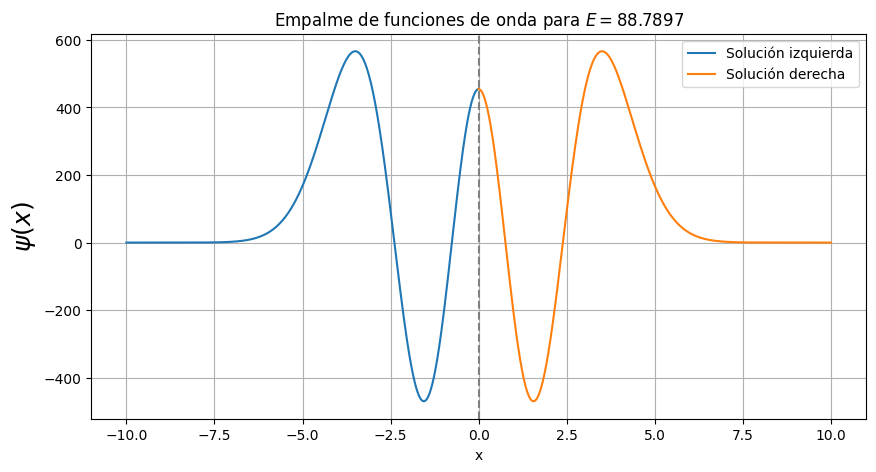

In [11]:
istep = 0  # Contador de iteraciones

# Bucle de bisección para encontrar la energía correcta
while abs(diff(e)) > eps:
    e = (amin + amax) / 2
    print(f"Energía tentativa: {e:.5f}  Iteración: {istep}")

    if diff(e) * diff(amax) > 0:
        amax = e
    else:
        amin = e
    istep += 1

# Al finalizar el ajuste, graficamos la solución final
x1 = np.arange(-10, 0.02, 0.02)
x2 = np.arange(10, -0.02, -0.02)

plt.figure(figsize=(10, 5))
plt.plot(x1, uL[:-2], label='Solución izquierda')
plt.plot(x2, uR[:-2], label='Solución derecha')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('$\psi(x)$', fontsize=18)
plt.title(f'Empalme de funciones de onda para $E = {e:.4f}$')
plt.legend()
plt.grid()
plt.show()




## ✨ Interpretación física del resultado

En este notebook hemos resuelto la ecuación de Schrödinger unidimensional para un **oscilador armónico cuántico** utilizando el **método de Numerov**, una técnica numérica altamente precisa para ecuaciones diferenciales de segundo orden.

### 🔬 ¿Qué significa el resultado?

- Encontramos un valor de energía \( E \) que permite empalmar dos soluciones independientes de la ecuación (una desde la izquierda y otra desde la derecha) en el punto \( x = 0 \), asegurando continuidad y derivabilidad.
- Este valor de energía es un **eigenvalor del sistema**, es decir, una de las energías permitidas para un estado cuántico.
- La solución obtenida es una **función de onda estacionaria**, que describe la probabilidad de encontrar una partícula en cada punto del espacio bajo un potencial cuadrático \( V(x) = k x^2 \).
- El método usado aquí es general y puede aplicarse a otros potenciales también.

### 📈 Visualización

Durante el proceso, observamos cómo las funciones de onda `uL` y `uR` se aproximan paso a paso hasta empalmarse suavemente en el centro, lo cual es una verificación visual de que la solución encontrada es físicamente válida.
